# Expérimentations sur NSL-KDD pour la détection de traffic anormal

Abdoul Diallo, Clément Nadal, Alex Portes Narrieu

Ce notebook jupyter est un ensemble d'expériences que nous avons menés sur le dataset NSL-KDD pour la détection de trafic anormal.

## Lecture des données

In [1]:
import os
import pandas as pd
import numpy as np
path = os.getcwd() + '/NSL-KDD/KDDTrain+.txt'
path2 = os.getcwd() + '/NSL-KDD/KDDTest+.txt'

# Les noms des colonnes viennent de ce projet : https://github.com/Mamcose/NSL-KDD-Network-Intrusion-Detection
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

data = pd.read_csv(path, header=None, names = col_names)
data_test = pd.read_csv(path2, header=None, names = col_names)

Nous avons récupéré notre dataset sur ce site : https://www.unb.ca/cic/datasets/nsl.html <br/>
Nous avons ajouté des noms à nos colonnes car le dataset initial n'en possédait pas.<br/>
Comme cela est commenté dans le code ci-dessus, nous avons récupéré les noms des colonnes sur ce github : https://github.com/Mamcose/NSL-KDD-Network-Intrusion-Detection<br/>
Nous possédons déjà un ensemble d'entrainement et de test dans notre dataset donc nous n'aurons pas besoin de scinder notre dataset par la suite.

## Visualisation des données

In [2]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## Encodage des données

Nous pouvons observer que nous avons des features qui ne sont pas des données numériques, nous allons donc les encoder pour pouvoir utiliser nos algorithmes de machine learning. Nous n'encodons pas encore les labels.

In [5]:
# Encodage des données d'entrainement

from sklearn.preprocessing import LabelEncoder

data_craft = data.copy()
data_label = data.loc[:,["label"]]
data_craft = data_craft.drop('label', axis=1)

# Nous encodons toutes les features qui sont des "object"
for col_name in data_craft.columns:
    if data_craft[col_name].dtypes == 'object' :
        print("The column "+col_name+" is not int or float type, let's encode it!")
        data_craft[col_name] = data_craft[col_name].astype('category')
        data_craft[col_name] = data_craft[col_name].cat.codes
        #data_craft = data_craft.join(new_encoded)
        #data_craft = data_craft.drop([col_name], axis=1)

data_craft = data_craft.join(data_label)
print()
print('Dimensions of datas after Encoding :',data_craft.shape)

The column protocol_type is not int or float type, let's encode it!
The column service is not int or float type, let's encode it!
The column flag is not int or float type, let's encode it!

Dimensions of datas after Encoding : (125973, 43)


In [6]:
data_craft.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level,label
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,neptune
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [7]:
# Encodage des données de test

data_craft_test = data_test.copy()
data_label_test = data_test.loc[:,["label"]]
data_craft_test = data_craft_test.drop('label', axis=1)

for col_name in data_craft_test.columns:
    if data_craft_test[col_name].dtypes == 'object' :
        print("The column "+col_name+" is not int or float type, let's encode it!")
        data_craft_test[col_name] = data_craft_test[col_name].astype('category')
        data_craft_test[col_name] = data_craft_test[col_name].cat.codes

data_craft_test = data_craft_test.join(data_label_test)
print()
print('Dimensions of datas after Encoding :',data_craft_test.shape)

The column protocol_type is not int or float type, let's encode it!
The column service is not int or float type, let's encode it!
The column flag is not int or float type, let's encode it!

Dimensions of datas after Encoding : (22544, 43)


Nous pouvons observer que désormais, nous possédons bien des features au format numérique (à l'exception de label).

## Résumé et renommage des ensemble

In [8]:
data_train = data_craft
data_test = data_craft_test

print('Dimensions of the Training set:',data_train.shape)
print('Dimensions of the Test set:',data_test.shape)

Dimensions of the Training set: (125973, 43)
Dimensions of the Test set: (22544, 43)


## Renommer les étiquettes

Ici, les étiquettes seront à 0 ou 1 suivant si c'est du trafic anormal ou un trafic normal. Nous spécifions quand meme ci dessous a quel type d'attaque correspond chaque label pour une eventuelle mutlticlassification.

### Classement des attaques selon leur type :
* Denial of Service attacks (DoS):
  * apache2
  * back
  * land
  * neptune
  * mailbomb
  * pod
  * processtable
  * smurf
  * teardrop
  * udpstorm
  * worm
* Probe attacks:
  * ipsweep
  * mscan
  * nmap
  * portsweep
  * saint
  * satan
* Privilege escalation attacks (U2R):
  * buffer_overflow
  * loadmdoule
  * perl
  * ps
  * rootkit
  * sqlattack
  * xterm
* Remote access attacks (R2L)
  * ftp_write
  * guess_passwd
  * http_tunnel
  * imap
  * multihop
  * named
  * phf
  * sendmail
  * snmpgetattack
  * snmpguess
  * spy
  * warezclient
  * warezmaster
  * xclock
  * xsnoop

In [9]:
def replace(attack):
    if attack =='normal':
        label = 0
    else:
        label = 1
    return label

new_train_labels = data_train.label.apply(replace)

new_test_labels = data_test.label.apply(replace)

In [10]:
data_train['label'] = new_train_labels
data_test['label'] = new_test_labels

In [11]:
i=0
for col_name in data_train.columns:
    print(str(i) + ": "+col_name + " is type " + str(data_train[col_name].dtypes))
    i+=1

0: duration is type int64
1: protocol_type is type int8
2: service is type int8
3: flag is type int8
4: src_bytes is type int64
5: dst_bytes is type int64
6: land is type int64
7: wrong_fragment is type int64
8: urgent is type int64
9: hot is type int64
10: num_failed_logins is type int64
11: logged_in is type int64
12: num_compromised is type int64
13: root_shell is type int64
14: su_attempted is type int64
15: num_root is type int64
16: num_file_creations is type int64
17: num_shells is type int64
18: num_access_files is type int64
19: num_outbound_cmds is type int64
20: is_host_login is type int64
21: is_guest_login is type int64
22: count is type int64
23: srv_count is type int64
24: serror_rate is type float64
25: srv_serror_rate is type float64
26: rerror_rate is type float64
27: srv_rerror_rate is type float64
28: same_srv_rate is type float64
29: diff_srv_rate is type float64
30: srv_diff_host_rate is type float64
31: dst_host_count is type int64
32: dst_host_srv_count is type 

In [12]:
train_Y = new_train_labels
train_X = data_train.drop(columns='label',axis=1)

test_Y = new_test_labels
test_X = data_test.drop(columns='label',axis=1)

## Tests sur quelques algorithmes

Dans la première version de notre code nous obtenions un excellent résultat sur Random Forest et KNN (plus de 99% sur l'ensemble de test). Le problème est que nous n'utilisions que l'ensemble d'entraînement et que nous le séparions par la suite en un ensemble d'entrainement et de test (avec la fonction train_test_split). Ce qui veut dire que l'algorithme effectuait ces tests sur du trafic dont il connaissait tous les paramètres. Dans la vrai vie, ca marche différemment, une attaque est souvent quelquechose d'original auquel nous ne penserions peut-être pas ou qui n'a pas encore été fait. C'est pourquoi il est fournit dans l'ensemble NSL-KDD deux ensembles d'entraînement et de test déjà séparés. L'ensemble de test contient des features qui ne sont pas dans l'ensemble d'entraînement, ce qui correspond mieux a une situation réelle. 

## Random Forest

In [13]:
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import multiprocessing
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

a = multiprocessing.cpu_count()

RF = RandomForestClassifier(n_estimators=20, criterion='gini', random_state= 10, verbose= 1, n_jobs=a)
RF.fit(train_X, train_Y)

print("Train score: ",RF.score(train_X, train_Y))

pred_rf = RF.predict(test_X)
print('Test score:',RF.score(test_X, test_Y))

print("Precision:",precision_score(test_Y,pred_rf))
print("Recall: ",recall_score(test_Y,pred_rf))
print("f-score; ", f1_score(test_Y, pred_rf))


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Train score:  1.0
Test score: 0.8380943931866572
Precision: 0.9733017214720132
Recall:  0.7357593703732564
f-score;  0.8380225437117245


[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished


Nos résultats sont un peu moins satisfaisants que lors du premier rendu. Nous observons une precision de 97% ce qui signifie une très grande majorité de prédictions justes. Nous obtenons un score sur l'ensemble de test de 83,8%, ce qui est plutôt satisfaisant. Notre recall est de 73,5% ce qui indique une précision sur les attaques plus faible.

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  18 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=12)]: Done  20 out of  20 | elapsed:    0.0s finished


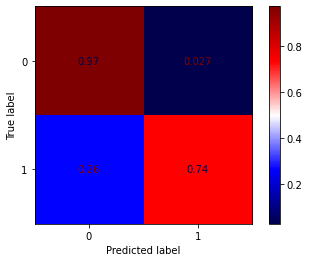

In [14]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(RF, test_X, test_Y, normalize='true', cmap='seismic')
plt.show()

La matrice de confusion se lit comme suit:
- en haut à gauche : les vrais négatifs
- en haut à droite : les faux positifs
- en bas à gauche : les faux négatifs
- en bas à droite : les vrais positifs

Ce que l'on cherche c'est donc de maximiser les bonnes prédictions. Dans un problème comme celui-ci (de détecter les attaques) il est critique de détecter un maximum d'attaques pour garantir la sureté du réseau. Nous avons un taux de détection des attaques de 74%, donc 26% d'attaques qui peuvent passer entre les mailles du filet. Ce n'est pas un taux assez élevé pour garantir un réseau sain.

## KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

KNN = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=9, n_jobs=a))
KNN.fit(train_X, train_Y)

print("Train score: ",KNN.score(train_X, train_Y))

pred_KNN = KNN.predict(test_X)
print('Test score:',KNN.score(test_X, test_Y))

print("Precision:",precision_score(test_Y,pred_KNN))
print("Recall: ",recall_score(test_Y,pred_KNN))

Train score:  0.9985155549204988
Test score: 0.8075319375443577
Precision: 0.9752685765443151
Recall:  0.6791085482739811


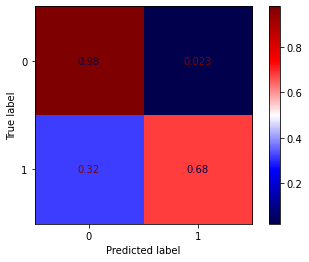

In [16]:
plot_confusion_matrix(KNN, test_X, test_Y, normalize='true', cmap='seismic')
plt.show()

Nous observons ici des résultats sont en deça de random forest. Nous observons quand même un taux de vrai négatifs similaires mais la détection des attaques est plus faible.

## Gaussian Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

GNB = make_pipeline(StandardScaler(), GaussianNB())
GNB.fit(train_X, train_Y)

print("Train score: ",GNB.score(train_X, train_Y))

pred_GNB = GNB.predict(test_X)

print('Test score:',GNB.score(test_X, test_Y))

print("Precision:",precision_score(test_Y,pred_GNB))
print("Recall: ",recall_score(test_Y,pred_GNB))

Train score:  0.8989704142951267
Test score: 0.8038502484031228
Precision: 0.9156864683206484
Recall:  0.7218888802306553


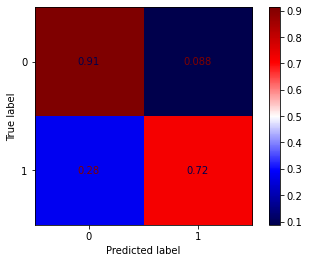

In [18]:
plot_confusion_matrix(GNB, test_X, test_Y, normalize='true', cmap='seismic')
plt.show()

Les résultats sont clairements moins satisfaisants que ceux de la foret aléatoire, le trafic normal et anormal sont moins bien détectés. 

# SVM

In [19]:
from sklearn.svm import SVC


svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(train_X, train_Y)

print("Train score: ",svc.score(train_X, train_Y))

pred_svc = svc.predict(test_X)

print('Test score:',svc.score(test_X, test_Y))

print("Precision:",precision_score(test_Y,pred_svc))
print("Recall: ",recall_score(test_Y,pred_svc))

Train score:  0.9974835877529312
Test score: 0.8518452803406671
Precision: 0.9663031731997249
Recall:  0.7664614665315982


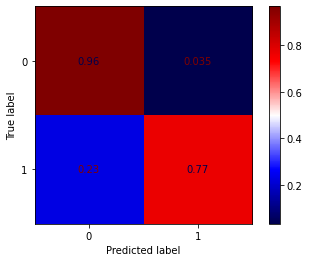

In [20]:
plot_confusion_matrix(svc, test_X, test_Y, normalize='true', cmap='seismic')
plt.show()

Le SVM obtient pour l'instant les meilleurs résultats, ils ne sont cependant toujours pas suffisemment satisfaisant pour ce genre de réseaux.

# Perceptron

In [21]:
from sklearn.linear_model import Perceptron

P = make_pipeline(MinMaxScaler(),Perceptron(penalty='l1', random_state=0, n_jobs=a, class_weight={0:1,1:99}))
P.fit(train_X, train_Y)

print("Train score: ",P.score(train_X, train_Y))

pred_P = P.predict(test_X)

print('Test score:',P.score(test_X, test_Y))

print("Precision:",precision_score(test_Y,pred_P))
print("Recall: ",recall_score(test_Y,pred_P))

Train score:  0.9151802370349201
Test score: 0.94388750887154
Precision: 0.9103291713961408
Recall:  0.9999220758980752


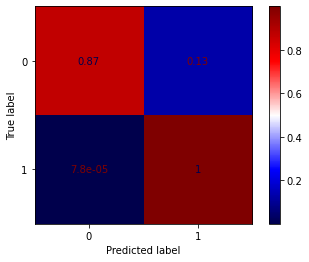

In [22]:
plot_confusion_matrix(P, test_X, test_Y, normalize='true', cmap='seismic')
plt.show()

Nous observons ici le taux de détection d'attaques le plus élevé, ceci au prix d'un peu de trafic normal, mais la priorité dans ce genre de réseaux est de laisser passer aussi peu d'attaques que possible. Ici nous avons choisit de donner un poids très élevé aux attaques, ce qui explique le pourcentage de détection très élevé.